In [1]:
from kaggle_handler import handler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
from sklearn.linear_model import LinearRegression

# Liner Regression (Supervised Learning)
- Types of Linear Regression
  1) **Simple Linear Regression**

         (1D Input & 1D Output)
  2) **Multiple Linear Regression**
    
         (Many (ND) Input & 1D Output)
  3) **Polynomial Linear Regression**
    
         (Non-Liner Data)
  4) **Regularzation**

# 1) Simple Linear Regression

In [3]:
X = np.arange(100).reshape(100,1)
delta = np.random.uniform(400,.5,size=(100,)).reshape(100,1)
y = (5*X) + delta

## Sklearn Model

In [4]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

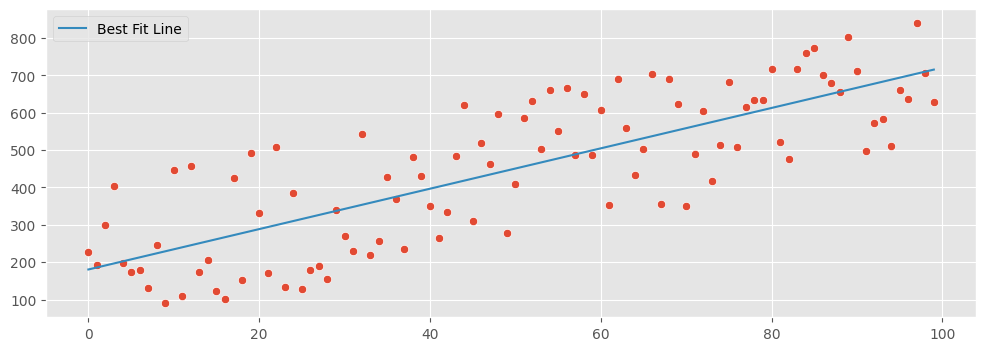

In [5]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=X[:,0],y=y[:,0])
plt.plot(X[:,0],y_pred[:,0], color='C1', label='Best Fit Line')
plt.legend()
plt.show()

In [6]:
lr.coef_

array([[5.40251431]])

In [7]:
lr.intercept_

array([180.53564978])

## My Model Using Direct Formula

In [8]:
class My_LR_Model():
    def __init__(self):
        self.m_ = None
        self.b_ = None
    def fit(self, X, y):
        self.m_ = np.sum((X - X.mean()) * (y - y.mean())) / np.sum((X - X.mean())**2)
        self.b_ = y.mean() - (self.m_*X.mean())
    def predict(self, X):
        return (self.m_*X) + self.b_

In [9]:
My_lr = My_LR_Model()
My_lr.fit(X,y)
My_y_pred = My_lr.predict(X)

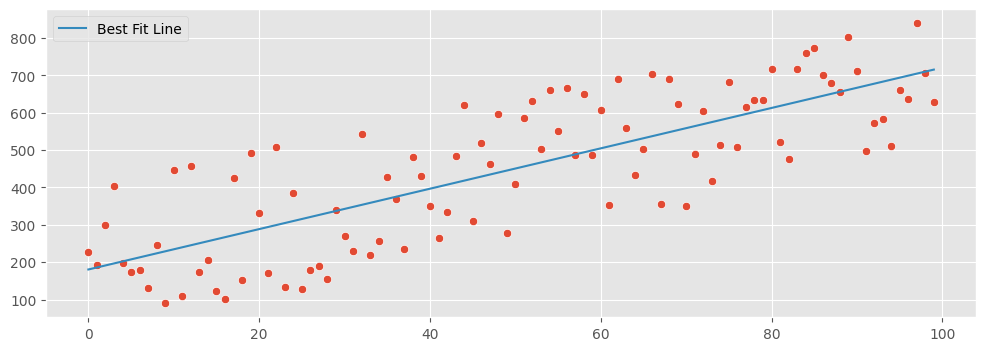

In [10]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=X[:,0],y=y[:,0])
plt.plot(X[:,0],My_y_pred[:,0], color='C1', label='Best Fit Line')
plt.legend()
plt.show()

In [11]:
My_lr.m_

np.float64(5.402514306296905)

In [12]:
My_lr.b_

np.float64(180.5356497828256)

# 2) Multiple Linear Regression